In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [13]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 
    return img_array


In [3]:
num_colors = 10

In [4]:
def build_multi_color_recognition_model(num_colors):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu',))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_colors, activation='sigmoid'))
    
    return model


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [7]:
color_model = build_multi_color_recognition_model(num_colors)
color_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
color_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [9]:
colors = color_model.fit(x_train,y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 13s 19ms/step - loss: 0.2780 - accuracy: 0.3151 - val_loss: 0.2349 - val_accuracy: 0.4492
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2192 - accuracy: 0.4993 - val_loss: 0.2064 - val_accuracy: 0.5279
Epoch 3/10
625/625 [==============================] - 12s 20ms/step - loss: 0.1951 - accuracy: 0.5663 - val_loss: 0.1892 - val_accuracy: 0.5820
Epoch 4/10
625/625 [==============================] - 13s 21ms/step - loss: 0.1762 - accuracy: 0.6169 - val_loss: 0.1786 - val_accuracy: 0.6095
Epoch 5/10
625/625 [==============================] - 12s 20ms/step - loss: 0.1635 - accuracy: 0.6524 - val_loss: 0.1679 - val_accuracy: 0.6371
Epoch 6/10
625/625 [==============================] - 13s 20ms/step - loss: 0.1526 - accuracy: 0.6767 - val_loss: 0.1551 - val_accuracy: 0.6733
Epoch 7/10
625/625 [==============================] - 12s 20ms/step - loss: 0.1427 - accuracy: 0.6989 - val_loss: 0.1556 - val_accuracy:

In [47]:
test_loss, test_accuracy  = color_model.evaluate(x_test, y_test, verbose=2)
print(f"test acc: {test_accuracy*100:2f}%")

313/313 - 1s - loss: 0.1461 - accuracy: 0.6968 - 1s/epoch - 3ms/step
test acc: 69.679999%


In [59]:
image_path = "C:/Users/aride/OneDrive/Рабочий стол/Новая папка (3)/sample/FpfUbPzaIAccUGO.png"
img_array = load_and_preprocess_image(image_path)

In [60]:
prediction = color_model.predict(img_array)

1/1 [==============================] - 0s 16ms/step


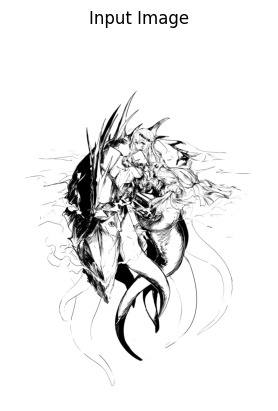

In [61]:
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

In [62]:
color_labels = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Purple', 'White', 'Black', 'Pink']

In [63]:
threshold = 0.5
selected_colors = [color_labels[i] for i in range(len(color_labels)) if prediction[0][i] > threshold]
print(f"Predicted Colors: {', '.join(selected_colors)}")

Predicted Colors: Red
